In [1]:
from qiskit_ionq import IonQProvider, ionq_job
ionq_provider = IonQProvider("mycsEhnoIgARQdch53Zm7KJUePwFD0Wr")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
from matplotlib import pyplot as plt
import numpy as np
import time
from qiskit.circuit import Parameter


In [2]:
sim_backend = ionq_provider.get_backend('ionq_simulator')

qpu_backend = ionq_provider.get_backend('ionq_qpu')

In [1283]:
s=1 #Alice
t=1 #Bob

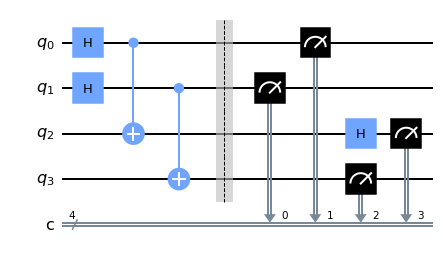

In [1284]:
qr = QuantumRegister(4,'q')
cr = ClassicalRegister(4,'c')
qc = QuantumCircuit(qr,cr)

qc.h(0)
qc.cx(0,2)

qc.h(1)
qc.cx(1,3)
qc.barrier()

if s==1:
    qc.measure(1,0)
    qc.measure(0,1)

if s==2:
    qc.h(0)
    qc.h(1)
    qc.measure(0,0)
    qc.measure(1,1)

if s==3:
    qc.h(0)
    qc.cx(0,1)
    qc.h(0)
    qc.measure(1,0)
    qc.measure(0,1)

if t==1:
    qc.h(2)
    qc.measure(3,2)
    qc.measure(2,3)

if t==2:
    qc.h(3)
    qc.measure(2,2)
    qc.measure(3,3)

if t==3:
    qc.cx(2,3)
    qc.h(2)
    qc.measure(3,2)
    qc.measure(2,3)


qc.draw(output='mpl')


In [1251]:
s=1 #Alice
t=1 #Bob

In [1252]:
f = open("C:/Users/cbk92/Desktop/해커톤/ID_2.2_11.txt",'r')
ID_after=f.readlines()



f.close()

In [1253]:

ID_after[0] = ID_after[0].strip('\n')

In [1254]:
arr_keys=[]
job_ret = qpu_backend.retrieve_job(ID_after[0])
probs = job_ret.get_probabilities()
all_keys=list(probs.keys())
arr_keys.append(all_keys)

In [1255]:
Alice=[]
Bob=[]
for i in range(len(all_keys)):
        value1=all_keys[i][3]
        value2=all_keys[i][2]
        value3=value1+value2
        value4=int(value1)^int(value2)
        value5=value3+str(value4)
        Alice.append(value5)
        value1=all_keys[i][1]
        value2=all_keys[i][0]
        value3=value1+value2
        value4=int(not(int(value1)^int(value2)))
        value5=value3+str(value4)
        Bob.append(value5) 

In [1256]:
check=0
flist=[]
for i in range(len(all_keys)):
    if s==3:
        if t==3:
            if Alice[i][t-1]!=Bob[i][s-1]:
                check=check+1
                ftot=[Alice[i],Bob[i]]
                flist.append(ftot)
            else:
                check=check

        else:
            if Alice[i][t-1]!=Bob[i][s-1]:
                check=check
                
            else:
                check=check+1
                ftot=[Alice[i],Bob[i]]
                flist.append(ftot)
        
    else:
        if Alice[i][t-1]==Bob[i][s-1]:
            check=check
        else:
            check=check+1
            ftot=[Alice[i],Bob[i]]
            flist.append(ftot)

if check==0:
    print("True")
else:
    print("False")

False


In [1257]:
for i in range(len(flist)):
    for j in range(2):
        flist[i][j]=flist[i][j][0:2]

In [1258]:
for i in range(len(flist)):
    for j in range(2):
        n1=flist[i][j][0]
        n2=flist[i][j][1]
        flist[i][j]=n2+n1

In [1259]:
fflist=[]
for i in range(len(flist)):
    n1=flist[i][0]
    n2=flist[i][1]
    fflist.append(n2+n1)

In [1260]:
err_prob = 0
for i in range(len(flist)):
    err_prob += probs.get(fflist[i])
err_prob

0.02734375

In [1162]:
job = sim_backend.run(qc,shots = 1024)

In [1163]:
k=job.get_probabilities()

In [1021]:
b=list(k.keys())

In [1022]:
Alice=[]
Bob=[]
for i in range(8):
        value1=b[i][3]
        value2=b[i][2]
        value3=value1+value2
        value4=int(value1)^int(value2)
        value5=value3+str(value4)
        Alice.append(value5)
        value1=b[i][1]
        value2=b[i][0]
        value3=value1+value2
        value4=int(not(int(value1)^int(value2)))
        value5=value3+str(value4)
        Bob.append(value5)                


In [1023]:
check=0
for i in range(8):
    v0=int(Alice[i][0])
    v1=int(Alice[i][1])
    v2=int(Alice[i][2])
    if v0+v1+v2==0 or v0+v1+v2==2:
        check=check
    else:
        check=check+1
if check==0:
    print("True")
else:
    print("False")    





True


In [1024]:
check=0
for i in range(8):
    v0=int(Bob[i][0])
    v1=int(Bob[i][1])
    v2=int(Bob[i][2])
    if v0+v1+v2==1 or v0+v1+v2==3:
        check=check
    else:
        check=check+1
if check==0:
    print("True")
else:
    print("False")    


True


In [1026]:
tlist=[]

In [1027]:
check=0
for i in range(8):
    if s==3:
        if t==3:
            if Alice[i][t-1]!=Bob[i][s-1]:
                check=check+1
            else:
                check=check
                tlist.append([Alice[i],Bob[i]])

        else:
            if Alice[i][t-1]!=Bob[i][s-1]:
                check=check
                tlist.append([Alice[i],Bob[i]])
            else:
                check=check+1
        
    else:
        if Alice[i][t-1]==Bob[i][s-1]:
            check=check
            tlist.append([Alice[i],Bob[i]])
        else:
            check=check+1

if check==0:
    print("True")
else:
    print("False")


True


In [1029]:
for i in range(len(tlist)):
    for j in range(2):
        tlist[i][j]=tlist[i][j][0:2]

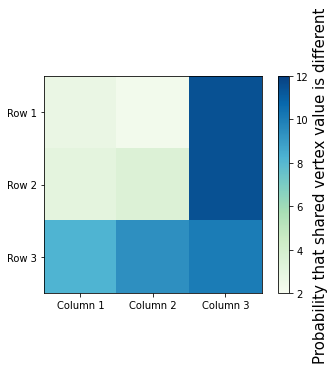

In [1282]:
y=[[2.73,2.25,11.43],[3.02,3.51,11.43],[8.20,9.37,10.02]]
plt.imshow(y,cmap='GnBu')
plt.xticks([0,1,2],labels=['Column 1','Column 2','Column 3'])
plt.yticks([0,1,2],labels=['Row 1','Row 2','Row 3'])
cbar = plt.colorbar()
cbar.set_label('Probability that shared vertex value is different',size=15)
plt.clim(2,12)